# A Data Analysis and predcition of Employee churn with python.

In [1]:
#import modules
import pandas as pd  # for dataframes
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
sns.set_style("darkgrid")
%matplotlib inline

# Importing our Datasets

In [2]:
#Employess that left
left = pd.read_excel("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx",sheet_name="Employees who have left")
left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [3]:
#Viewing the datasets from below
left.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
3566,14995,0.40,0.57,2,151,3,0,0,support,low
3567,14996,0.37,0.48,2,160,3,0,0,support,low
3568,14997,0.37,0.53,2,143,3,0,0,support,low
3569,14998,0.11,0.96,6,280,4,0,0,support,low
3570,14999,0.37,0.52,2,158,3,0,0,support,low


In [4]:
emp_ex = pd.read_excel("Hash-Analytic-Python-Analytics-Problem-case-study-1.xlsx",sheet_name="Existing employees")
emp_ex.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [5]:
#Viewing the datasets from below
emp_ex.tail()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
11423,14207,0.90,0.55,3,259,10,1,1,management,high
11424,14208,0.74,0.95,5,266,10,0,1,management,high
11425,14209,0.85,0.54,3,185,10,0,1,management,high
11426,14210,0.33,0.65,3,172,10,0,1,marketing,high
11427,14211,0.50,0.73,4,180,3,0,0,IT,low


# Reserving data for prediction

I am taking just 0.01% of the Existing Employees dataset...I'm reserving it so I can use it to test for employees that may likely leave later on in the future.

In [6]:
existing_emp = emp_ex.sample(frac=0.99,random_state=200)

reserved_data = emp_ex.drop(existing_emp.index)


## Basic information about our data

Let's begin by inspecting the datasets

In [7]:
#shape of the datasets
print(left.shape)
print(existing_emp.shape)

(3571, 10)
(11314, 10)


In [8]:
# Column datatypes
print(existing_emp.dtypes)
print("\n")
print(left.dtypes)


Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object


Emp ID                     int64
satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object


In [9]:
print(existing_emp.columns)
print(left.columns)

Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')
Index(['Emp ID', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary'],
      dtype='object')


# Adding a new column  "status"
Now we'll have to be creative.
We are going to create a new column named *status* and set it to 0 for those employees that stayed.
We'll also do the same for the same for the *left* dataset and set it to 1 for those employees that left.

We will then explore the data and combine them so we can use them to make our prediction so we can predict those that will leave the company in the future.

In [10]:
existing_emp["status"] = 0

In [11]:
existing_emp.shape

(11314, 11)

In [12]:
left["status"]=1

In [13]:
left.head()#Let's confirm it

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,1
1,2,0.80,0.86,5,262,6,0,0,sales,medium,1
2,3,0.11,0.88,7,272,4,0,0,sales,medium,1
3,4,0.72,0.87,5,223,5,0,0,sales,low,1
4,5,0.37,0.52,2,159,3,0,0,sales,low,1


# Combining the Data

In [14]:
df = pd.concat([existing_emp,left],ignore_index=True)

# Let's Explore our Data and also Visualize

In [15]:
df.shape

(14885, 11)

In [16]:
df.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
status                   0
dtype: int64

##### The features are as follows: each row represent individual employee and attached attribute to them.
- satisfaction_level (0–1)
- last_evaluation (Time since last evaluation in years)
- number_project (Number of projects completed while at work)
- average_monthly_hours (Average monthly hours at workplace)
- time_spend_company (Time spent at the company in years)
- Work_accident (Whether the employee had a workplace accident)
- status (Whether the employee left the workplace or not (1=left or 0=stayed))
- promotion_last_5 years (Whether the employee was promoted in the last five years)
- dept (Department in which they work for)
- salary (Relative level of salary)


In [17]:
df.head(20)
df = df.drop("Emp ID",axis=1)#dropping the employee ID
reserved_data=reserved_data.drop("Emp ID", axis=1)

In [18]:
existing_emp["salary"].value_counts()

low       5093
medium    5077
high      1144
Name: salary, dtype: int64

In [19]:
left["salary"].value_counts()

low       2172
medium    1317
high        82
Name: salary, dtype: int64

In [20]:
existing_emp_rate = (5093/11314) * 100
left_rate = (2172/3571) * 100
overall_rate = ((5093+2172)/14885)*100
print(existing_emp_rate,"%")
print(left_rate,"%")
print(overall_rate,"%")

45.015025631960405 %
60.82329879585551 %
48.80752435337588 %


We can clearly see that over 50% of employees that left had low salaries while those that stayed  with low income are less than 50%...and the appr. 49% all the employees combined are on low salary.


# Summary Statistics

In [21]:
left.describe()# Summarize numerical features for those that left

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,status
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.0
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,1.0
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759,0.0
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000,1.0
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000,1.0
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000,1.0
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000,1.0
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000,1.0


In [22]:
# Summarize numerical features
existing_emp.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,status
count,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.000000,11314.0
mean,7810.668199,0.666810,0.715380,3.786548,199.071062,3.379795,0.175712,0.026251,0.0
std,3453.030215,0.216898,0.161957,0.979933,45.690463,1.564179,0.380591,0.159887,0.0
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.0
25%,4861.250000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000,0.0
50%,7709.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000,0.0
75%,10569.750000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000,0.0
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000,0.0


In [23]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,status
count,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000,14885.000000
mean,0.612421,0.716036,3.803090,201.073833,3.498959,0.144911,0.021229,0.239906
std,0.248675,0.171203,1.234358,49.979064,1.460794,0.352023,0.144153,0.427040
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [24]:
# Summarize categorical features
df.describe(include=['object'])

,dept,salary
count,14885,14885
unique,10,3
top,sales,low
freq,4109,7265


# status

In [25]:
df.status.value_counts()

0    11314
1     3571
Name: status, dtype: int64

In [26]:
percent_left = (len(left)/len(df))*100
percent_left

23.990594558280147

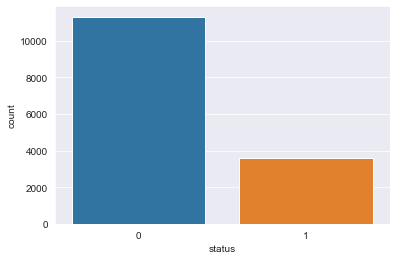

In [27]:
sns.countplot(df.status)

Here, you can see that approx 3,571 left, and 11,314 stayed. The no of employees that left the company is 24% of the total employment dataset combined.



### Distribution
Let's see how distributed our numerical columns are.

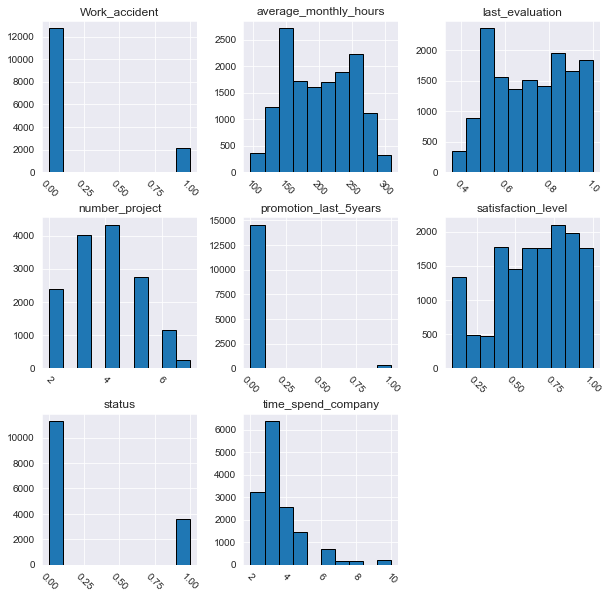

In [28]:
# Plot histogram grid with pandas plot
df.hist(figsize=(10,10), xrot=-45, edgecolor='black')
plt.show()

We can use a loop to display bar plots for each of the categorical features.

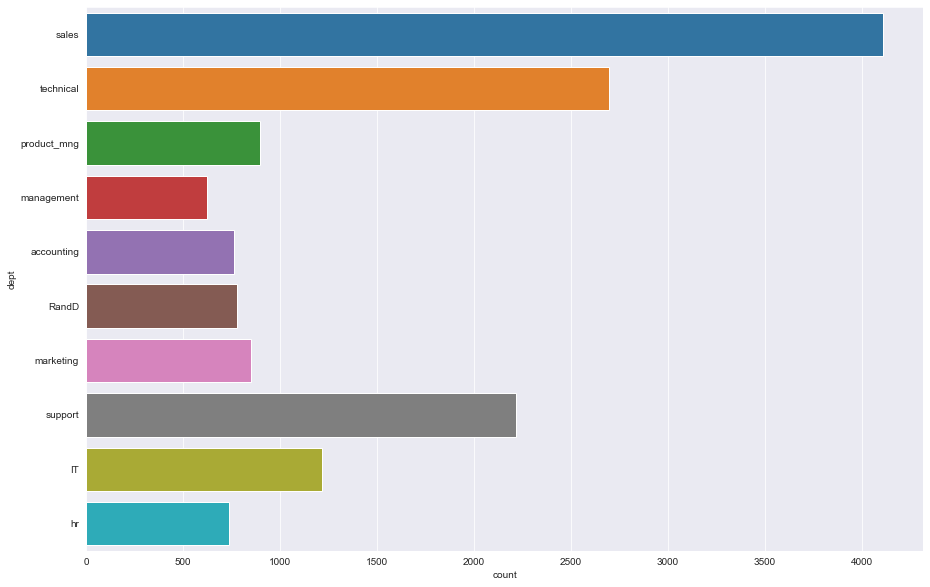

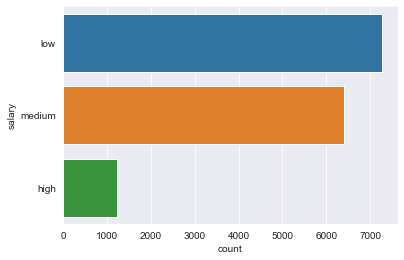

In [29]:
# Plot bar plot for each categorical feature
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
plt.figure(figsize = (15,10))
for cat_feat in categorical_features:
    sns.countplot(y = cat_feat, data=df)
    plt.show()

- It is obvious that from the overall data, majority of the employees are on low salary while just a few are on a high salary.

- Most of the employees are in the sales dept

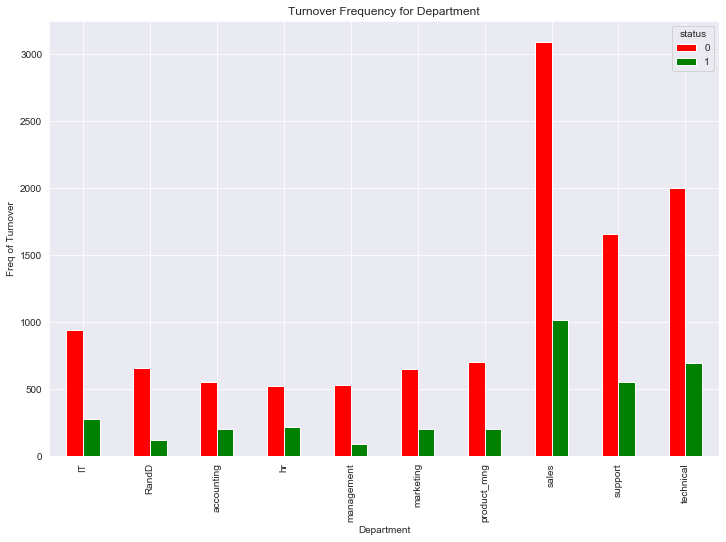

In [30]:
pd.crosstab(df.dept,df.status).plot(kind="bar",color=("red","green"),figsize = (12,8))
plt.title("Turnover Frequency for Department")
plt.xlabel("Department")
plt.ylabel("Freq of Turnover")
plt.savefig("dept_turnover_bar_chart.png")

Sales department has the highest number of employess that left, followed by technical and then support.

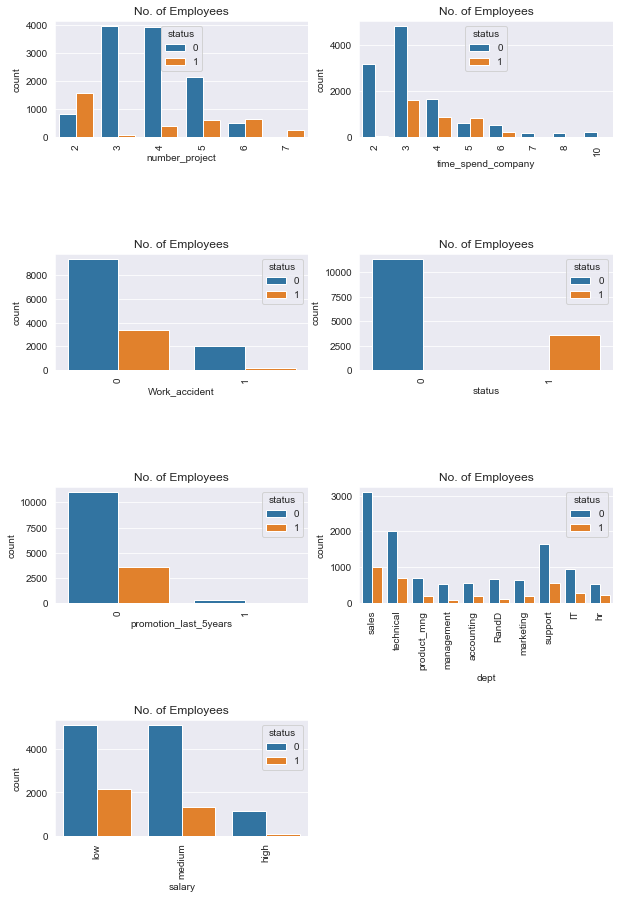

In [31]:
features=['number_project','time_spend_company','Work_accident','status', 'promotion_last_5years','dept','salary']

fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='status')
    plt.xticks(rotation=90)
    plt.title("No. of Employees")

##### You can observe the following points in the above visualization:

- Those employees who have the number of projects from 4 and above left the company it seems to like that they were overloaded with work.
- Employees with 3 to 5 years experience are leaving more. The ones with more experience are not leaving because of affection/affiliation with the company.
- Those who got promotion in last 5 years they didn't leave, i.e. all those left they didn't get the promotion in the previous 5 years.
- More Employees left from the sales department.
- Employees with low salary left the department more.

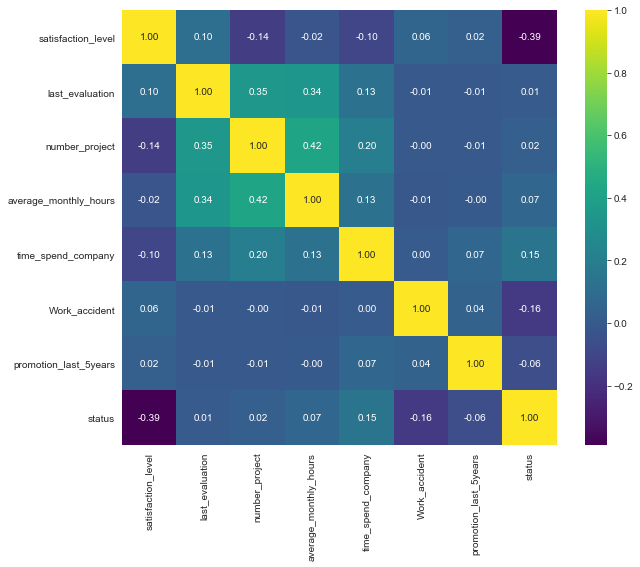

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="viridis",fmt='.2f', square=True,annot=True)
plt.savefig("time_spent_stautus_corr_heatmap_chart.png")
plt.show()


From the heatmap above, we can deduce that the average time spent and monthly at the company is highly correlated to the status of those who left. Hence it might be part of the reason they left.
We won't conclude yet until we've done our modelling.



## Convert categorical variables to numerical
Let's convert the categorical columns to numerical...so it can be reflected on the heatmap hence we'll see they impact on the employees' decision to leave.
We will transorm the department and salary columns into numerical using pandas get_dummies.

In [33]:
df = pd.get_dummies(df, columns = ["salary","dept"],prefix=["salary","dept"])

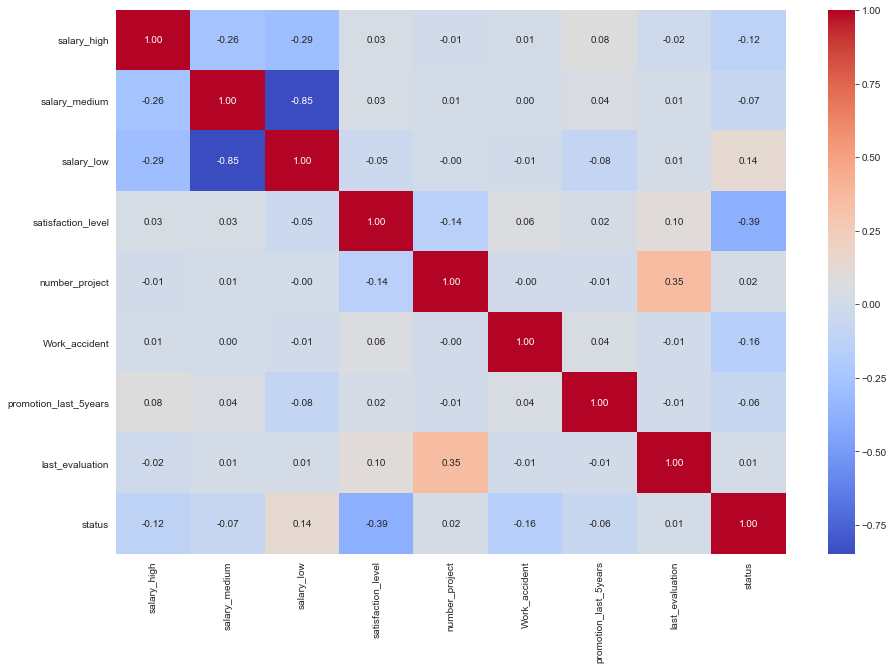

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(df[["salary_high","salary_medium","salary_low","satisfaction_level","number_project","Work_accident",
                "promotion_last_5years","last_evaluation","status",]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.savefig("salary_status_corr_heatmap.png")
plt.show()

From this heatmap, we can also tell that the low_salary is correlated with status as well.


Finally, Group by 'status' and calculate the average value of each feature within each class

In [35]:
df.groupby("status").mean()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
status,,,,,,,,,,,,,,,,,,,,
0,0.666810,0.715380,3.786548,199.071062,3.379795,0.175712,0.026251,0.101114,0.450150,0.448736,0.083436,0.058246,0.049143,0.045961,0.047110,0.057186,0.061870,0.273555,0.146632,0.176861
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.022963,0.608233,0.368804,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183


In [36]:
df.groupby("number_project").mean()

,satisfaction_level,last_evaluation,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,status,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
number_project,,,,,,,,,,,,,,,,,,,,
2,0.478652,0.568039,160.364553,3.181856,0.092818,0.015540,0.658127,0.057539,0.564049,0.378412,0.076018,0.036539,0.052499,0.058799,0.032759,0.064259,0.062579,0.299874,0.146997,0.169677
3,0.687757,0.716481,197.391478,3.288313,0.176177,0.023673,0.017942,0.100673,0.441316,0.458011,0.085223,0.060553,0.049090,0.053327,0.042113,0.061052,0.058061,0.268876,0.147271,0.174433
4,0.695333,0.740381,205.198013,3.452403,0.156423,0.026571,0.094501,0.084335,0.477588,0.438078,0.079713,0.051756,0.050370,0.051063,0.047366,0.057070,0.060305,0.272181,0.149261,0.180915
5,0.678353,0.762224,212.221329,3.803506,0.151205,0.017896,0.223521,0.089116,0.478451,0.432432,0.085464,0.058802,0.050767,0.034332,0.042732,0.050767,0.061359,0.273923,0.156318,0.185537
6,0.272985,0.786185,238.827203,4.192472,0.114628,0.017109,0.560308,0.062447,0.538922,0.398631,0.081266,0.044482,0.056459,0.045338,0.035928,0.043627,0.060736,0.274594,0.147990,0.209581
7,0.118711,0.859609,276.078125,4.113281,0.015625,0.000000,1.000000,0.011719,0.562500,0.425781,0.078125,0.050781,0.058594,0.050781,0.050781,0.058594,0.062500,0.261719,0.101562,0.226562


# Summary:
Those who left:

- had less satisfaction at the company
- spent the most hours at work in a month
- spent more time at the company
- had lower number of accidents
- had less promotion in the last 5 years.
- People with *3 years* of experience tend to leave often

### The Following points can be drawn using above plots:
- 1: The satisfaction level of people leaving the company is lower than people loyal to company. An important predictor.
- 2: The average monthly hours for people leaving the company is more than people with less work hours. Point of frustration maybe :)
- 3: Employees who got promotion in last 5 years tend to be loyal to company compared to people who were denied for promotion.
- 4: Employees with less accidents tend to remain in the company as compared to people with higher number of accidents.
- 5: Employee who has carried out more project tend to leave the company ans could be seen using: data.groupby(“number_project”).mean()

# Cluster Analysis:
Let's find out the groups of employees who left. You can observe that one of the most important factor for any employee to stay or leave is his satisfaction, salary, evaluation and time spent in performance at the company. So let's bunch them in the group of people using cluster analysis.

### Satisfaction Level and Last evaluation
 Wewill group them into 3 different clusters

In [37]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_empl =  df[['satisfaction_level', 'last_evaluation']][df.status == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_empl)

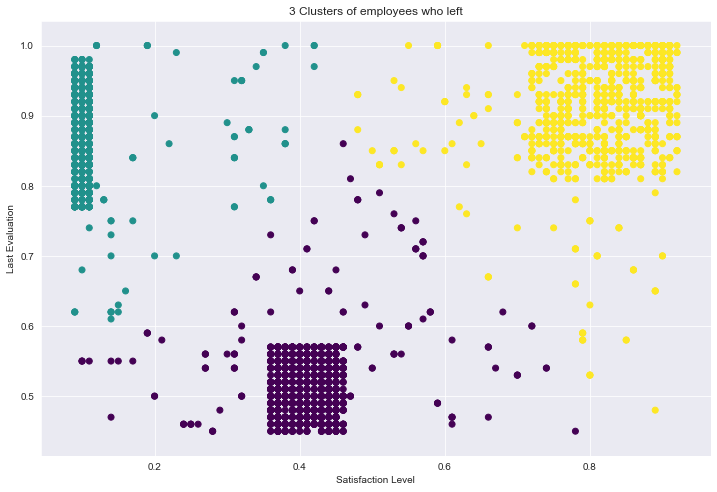

In [38]:
# Add new column "label" annd assign cluster labels.
left_empl['label'] = kmeans.labels_

# We plot a scatter plot
plt.figure(figsize=(12,8))
plt.scatter(left_empl['satisfaction_level'], left_empl['last_evaluation'], c=left_empl['label'],cmap='viridis')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.savefig("Clustering based on satisfaction level on employees that left")
plt.show()

From the 3 clusters:
-  yellow = had high evaluation and high satisfaction rate...These ones must have left for due to other reasons.
- green = had  high evaluation but low satisfaction...(They definitely thought about leaving because of low satisfaction)
- Purple = Relatively low evaluation and low satisfaction rate. Hence the reason they left.

## Satisfaction Level and Average monthly hours

In [40]:
#import module
from sklearn.cluster import KMeans
# Filter data
left_empl =  df[['satisfaction_level', 'average_monthly_hours']][df.status == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_empl)

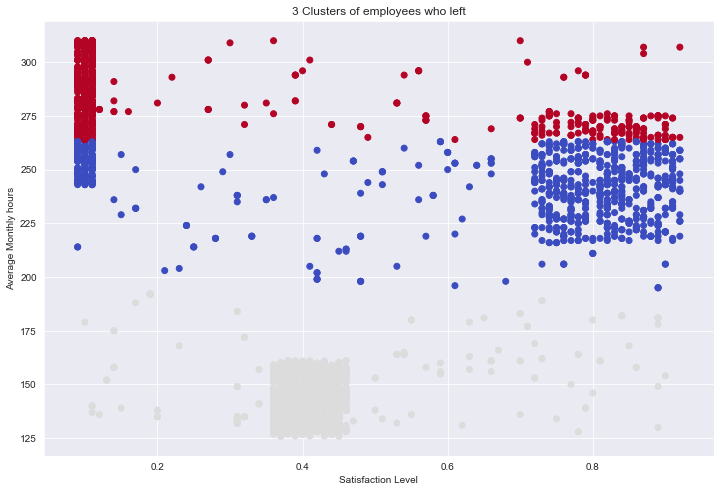

In [41]:
# Add new column "label" annd assign cluster labels.
left_empl['label'] = kmeans.labels_

# We plot a scatter plot
plt.figure(figsize=(12,8))
plt.scatter(left_empl['satisfaction_level'], left_empl['average_monthly_hours'], c=left_empl['label'],cmap='coolwarm')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly hours')
plt.title('3 Clusters of employees who left')
plt.savefig("Clustering based on time spent and satisfaction level for employess that left")
plt.show()

From the 3 clusters:
-  maroon = Majority spent a lot of time at the office with low satisfaction rate. Although few had spent much time with high satisfaction rate...it seems they had a higher promotion rate, hence they were satisfied.

- blue = spent an average amount of time with mostly high satisfaction rate...We'll conclude later after we,ve built our model.

- gray = Relatively spent lower time with low satisfaction rate. They would most likely have left due to lack of promotion and/or low salary.

## Existing Employes that may likely leave the company in the near future 


In [42]:
#import module
from sklearn.cluster import KMeans
# Filter data
exist_empl =  df[['satisfaction_level', 'average_monthly_hours']][df.status == 0]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(exist_empl)

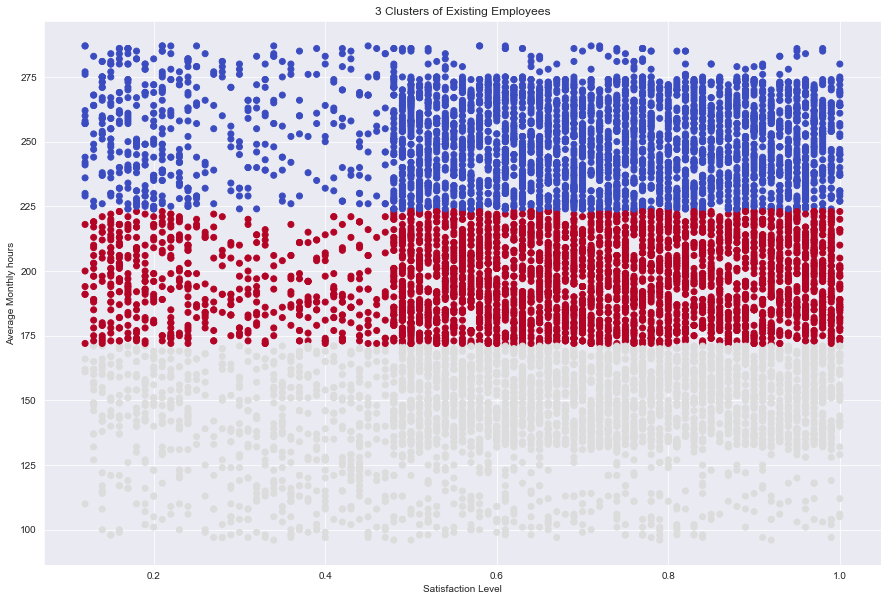

In [44]:
# Add new column "label" annd assign cluster labels.
exist_empl['label'] = kmeans.labels_

# We plot a scatter plot
plt.figure(figsize=(15,10))
plt.scatter(exist_empl['satisfaction_level'], exist_empl['average_monthly_hours'], c=exist_empl['label'],cmap='coolwarm')
plt.xlabel('Satisfaction Level')
plt.ylabel('Average Monthly hours')
plt.title("3 Clusters of Existing Employees")
plt.savefig("Clustering based on average_monthlhy_hours and satisfaction level")
plt.show()

#### So those that may likely leave the company in future:
- blue = Those who spent a lot of hours(>=225 hrs) but have a low satisfaction rate.

- red = Those that spend a monthly average >=170 hrs with low satisfaction rate(Not that many though).
- gray = They spend a low monthly average <=170 hrs with high satisfaction rate. Majority of these ones will most likely remain in the company. The ones with very low satisfaction rate may also leave due to other factors.

In [45]:
#import module
from sklearn.cluster import KMeans
# Filter data
exist_empl =  df[['satisfaction_level', 'last_evaluation']][df.status == 0]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(exist_empl)

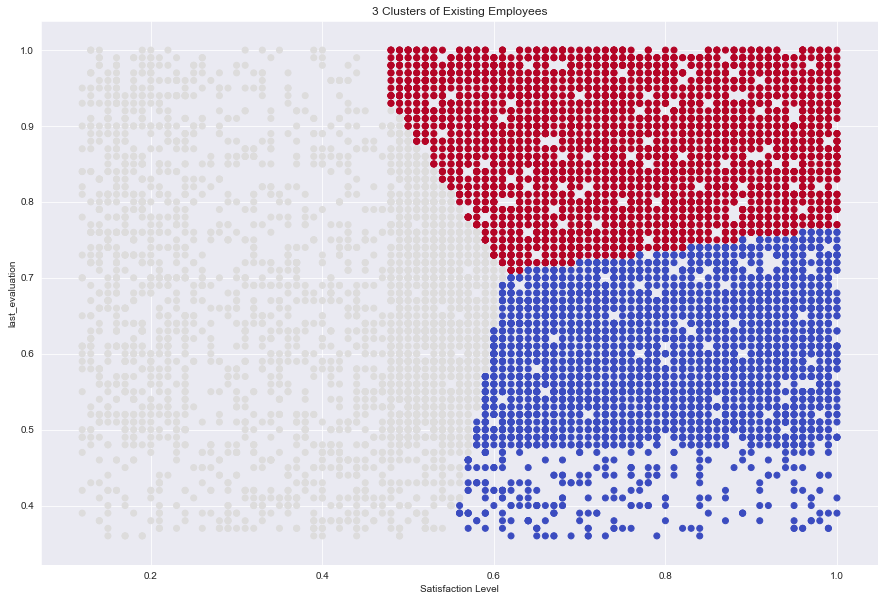

In [46]:
# Add new column "label" annd assign cluster labels.
exist_empl['label'] = kmeans.labels_

# We plot a scatter plot
plt.figure(figsize=(15,10))
plt.scatter(exist_empl['satisfaction_level'], exist_empl['last_evaluation'], c=exist_empl['label'],cmap='coolwarm')
plt.xlabel('Satisfaction Level')
plt.ylabel('last_evaluation')
plt.title("3 Clusters of Existing Employees")
plt.savefig("Clustering based on last_evaluation and satisfaction level")
plt.show()

## From this cluster, we can conclude that based on evaluation and satisfaction, the cluster of employees with gray all have low satisfaction and will therefore likely leave in the future.

In [47]:
#import module
from sklearn.cluster import KMeans
# Filter data
exist_empl =  df[['satisfaction_level', 'number_project']][df.status == 0]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(exist_empl)

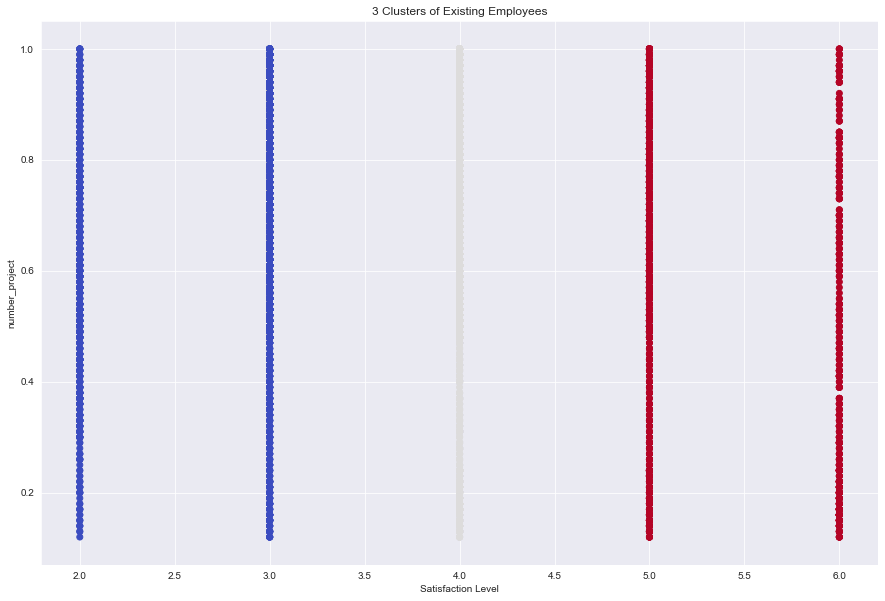

In [48]:
# Add new column "label" annd assign cluster labels.
exist_empl['label'] = kmeans.labels_

# We plot a scatter plot
plt.figure(figsize=(15,10))
plt.scatter(exist_empl['number_project'], exist_empl['satisfaction_level'], c=exist_empl['label'],cmap='coolwarm')
plt.xlabel('Satisfaction Level')
plt.ylabel('number_project')
plt.title("3 Clusters of Existing Employees")
plt.savefig("Clustering based on number_project and satisfaction level")
plt.show()

## Building a Prediction Model
### Pre-Processing Data
Machine learning algorithms require numerical input data, we have already conerted all the categorical data earlier so let's proceed.

## Splitting the data into train and test Set

The data will be splitted into two sets in the ration 70% (for training set) and 30%(for the test set). 
Recall that we also have some reserved data of existing exployees...We shall be using them to predict the employees that will likely leave the company.

In [49]:
X=df.drop("status",axis=1)
y=df['status']

In [50]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

## Let's build our employee churn prediction model.
We'll be using the GradientBoostingClassifier and the Random ForestClassifier algorithms. We will then fit the model and make our predictions.

In [51]:
#Import Gradient Boosting Classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

## Evaluating Model Performance

In [55]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred)*100,2))
# Model Precision
print("Precision:",round(metrics.precision_score(y_test, y_pred)*100,2))
# Model Recall
print("Recall:",round(metrics.recall_score(y_test, y_pred)*100,2))
print("Training set score: {:.2f}".format(gb.score(X_train, y_train)*100,2))

Accuracy: 97.96
Precision: 96.13
Recall: 94.9
Training set score: 97.56


Our model performed very well on the test set. Let's check how many it predicted rightly and wrongly by using the confusion matrix

In [56]:
# Import confusion_matrix
from sklearn.metrics import  confusion_matrix

# Display confusion matrix for y_test and pred
confusion_matrix(y_test, y_pred)

array([[3407,   39],
       [  52,  968]], dtype=int64)

#### Summary
- 3407 = Those that won't leave ---correctly predicted
- 968 = Those that left --- correctly predicted
- 52 = Those that won't leave ---- wrongly predicted.
- 39 = Those that left --- wrongly predicted.

Let's use the Random forest algorithm. 

In [57]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import (RandomForestClassifier)

# For standardization
from sklearn.preprocessing  import StandardScaler

In [58]:
rf = RandomForestClassifier()
rf =  RandomForestClassifier(n_estimators=10,
                             criterion="entropy",random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [59]:
rf_pred = rf.predict(X_test)
y_prob =  rf.predict_proba(X_test)

In [60]:
print("Accuracy:",round(metrics.accuracy_score(y_test, rf_pred)*100,2))
# Model Precision
print("Precision:",round(metrics.precision_score(y_test, rf_pred)*100,2))
# Model Recall
print("Recall:",round(metrics.recall_score(y_test, rf_pred)*100,2))
print("Training set score: {:.2f}".format(rf.score(X_train, y_train)*100,2))
print(y_prob)

Accuracy: 99.08
Precision: 99.1
Recall: 96.86
Training set score: 99.79
[[0.9 0.1]
 [1.  0. ]
 [1.  0. ]
 ...
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]]


In [84]:
# Display confusion matrix for y_test and pred
confusion_matrix(y_test, rf_pred)

array([[3437,    9],
       [  32,  988]], dtype=int64)

#### Summary
- 3437 = Those that won't leave ---correctly predicted
- 988 = Those that left --- correctly predicted
- 32 = Those that won't leave ---- wrongly predicted.
- 9 = Those that left --- wrongly predicted.

Our Random Forest performed better.

Remember our reserved data?
Let's test it

In [85]:
reserved_data = pd.get_dummies(reserved_data, columns = ["salary","dept"],prefix=["salary","dept"])

In [89]:
reserved_data = reserved_data.drop("Emp ID",axis=1)
reserved_data.shape

(114, 20)

In [92]:
rf_pred = rf.predict_proba(reserved_data)

In [94]:
rf_pred[:5]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.9, 0.1]])

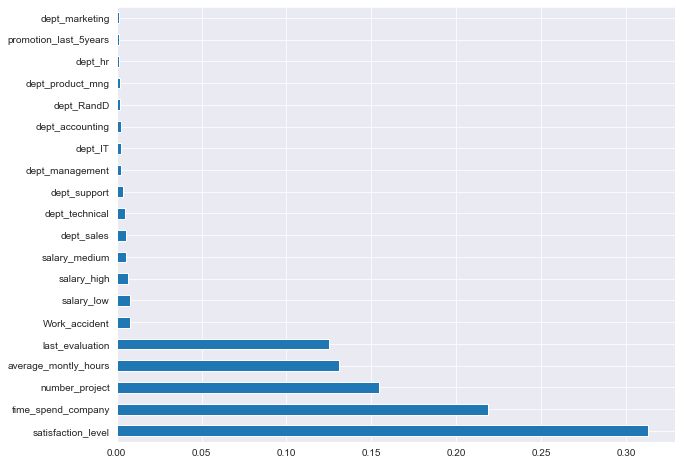

In [107]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(rf.feature_importances_, index=reserved_data.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh') #Remember to plot
plt.savefig("Reserved_data_feature_importance.png")
plt.show()

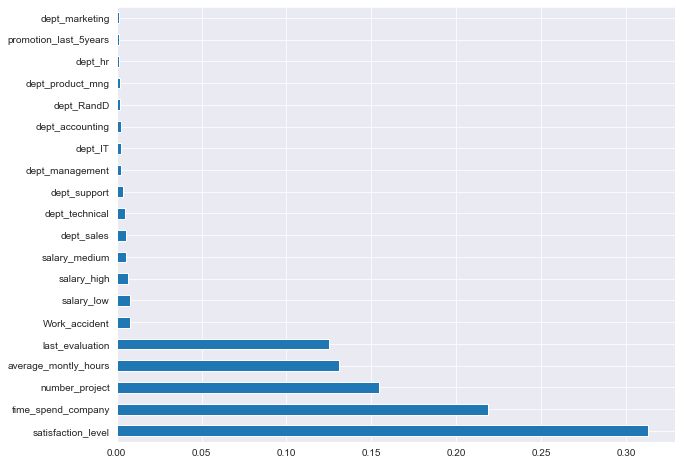

In [108]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh') #Remember to plot
plt.savefig("Random forest_feature_importance.png")

In [ ]:
plt.figure(figsize=(10,8))
feat_importances = pd.Series(gb.feature_importances_, index=X.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh') #Remember to plot
plt.savefig("Gradient_boosting_feature_importance.png")

# Summary
From the feature importance plots, we can definitly conclude that *Employee satisfaction* had the most important influence on the employee's decision to either leave or stay. Other influencing features were **time spent in the company, number of projects, last_evaluation and Average monthly hours**